In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [37]:
import pickle

In [2]:
dataset = pd.read_csv("C:/Users/Forge-15 1650/Documents/Datasets/DatingAppReviewsDataset.csv")

In [3]:
dataset.head()

,Unnamed: 0,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


In [4]:
dataset.shape

(681994, 7)

In [5]:
dataset.columns

Index(['Unnamed: 0', 'Name', 'Review', 'Rating', '#ThumbsUp', 'Date&Time',
       'App'],
      dtype='object')

In [6]:
dataset.isnull().sum()

Unnamed: 0       0
Name             5
Review        1352
Rating           0
#ThumbsUp        0
Date&Time        0
App              0
dtype: int64

In [7]:
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset

,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder
...,...,...,...,...,...,...
681989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,12-07-2017 01:44,Hinge
681990,Brian Shook,I can't get past the initial set up. It won't...,1,11,12-07-2017 01:36,Hinge
681991,A Google user,This is incredible! A quality dating app for A...,5,1,12-07-2017 01:32,Hinge
681992,A Google user,"""Over Water"" ... Can't choose location.",2,8,12-07-2017 01:28,Hinge


In [8]:
dataset.dtypes

Name         object
Review       object
Rating        int64
#ThumbsUp     int64
Date&Time    object
App          object
dtype: object

In [9]:
dataset.head()

,Name,Review,Rating,#ThumbsUp,Date&Time,App
0,linah sibanda,On this app i cant find a partner,5,0,18-02-2022 01:19,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,18-02-2022 01:16,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,0,18-02-2022 01:11,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,18-02-2022 01:11,Tinder
4,Arthur Magamedov,Love it!,5,0,18-02-2022 01:06,Tinder


# Data Preparation

In [10]:
dataset.columns = ['name', 'review', 'rating', 'thumbs_up', 'date_time', 'app']

In [11]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

In [12]:
dataset['review'] = dataset['review'].fillna("no review")
dataset['review'] = dataset['review'].astype("str")

In [13]:
dataset['name'] = dataset['name'].fillna("no name")

In [14]:
# remove those rating is '0' because it is pointless
dataset = dataset[dataset['rating'] != 0]

In [38]:
# store the dataset for future usage
with open("C:/Users/Forge-15 1650/Google Drive/Portfolio/Playground/dating.pickle", 'wb') as output:
    pickle.dump(dataset, output)

# Data Observation

## Future usage, starts here:

In [39]:
dataset = pd.read_pickle("./dating.pickle")

In [15]:
sb.set_style("whitegrid")

In [16]:
tinder = dataset.app.value_counts()[0]
bumble = dataset.app.value_counts()[1]
hinge = dataset.app.value_counts()[2]

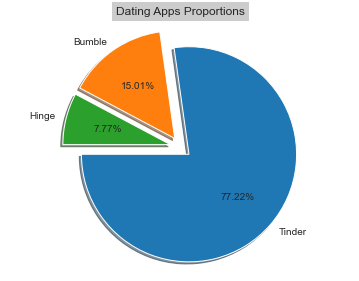

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Tinder', 'Bumble', 'Hinge']
sizes = [tinder, bumble, hinge]
values = [tinder, bumble, hinge]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

"""
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
"""

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

fig1, ax1 = plt.subplots()
fig1.subplots_adjust(0.1,0)
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(values),shadow=True, startangle=180)
# ax1.pie(sizes, explode=explode, labels=labels,shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Dating Apps Proportions", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

In [18]:
dataset['thumbs_up'].value_counts()

0      560697
1       68141
2       17788
3        7364
4        4309
        ...  
820         1
732         1
706         1
785         1
450         1
Name: thumbs_up, Length: 683, dtype: int64

## 1. Ratings quantity on each app (make an average score)
## 2. reviews quantity on each app (make an average score)
## 3. The time of people making the review on each app

---------------------------------------------------------

# 1. Ratings quantity on each app (make an average score)

In [19]:
ratings_analyst = dataset[['app', 'rating']]

In [20]:
# need to remove that '0' rating lol
ratings_analyst[ratings_analyst['app'] == "Tinder"]['rating'].value_counts().sort_index()

1    195637
2     38072
3     42828
4     65141
5    184937
Name: rating, dtype: int64

In [21]:
ratings_analyst[ratings_analyst['app'] == "Bumble"]['rating'].value_counts().sort_index()

1    40412
2     9674
3     8841
4    13589
5    29868
Name: rating, dtype: int64

In [22]:
ratings_analyst[ratings_analyst['app'] == "Hinge"]['rating'].value_counts().sort_index()

1    15920
2     4509
3     5289
4     8617
5    18659
Name: rating, dtype: int64

In [23]:
ratings_analyst[ratings_analyst['app'] == "Tinder"]['rating'].value_counts().sort_index().rename_axis('rating').reset_index(name='counts')

,rating,counts
0,1,195637
1,2,38072
2,3,42828
3,4,65141
4,5,184937


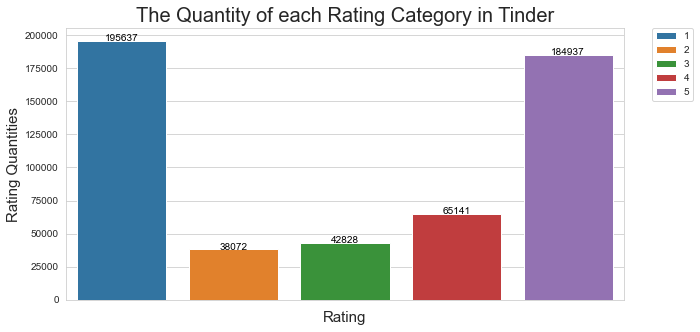

In [24]:
tinder_rating = ratings_analyst[ratings_analyst['app'] == "Tinder"]['rating'].value_counts().sort_index().rename_axis('rating').reset_index(name='counts')

labels = tinder_rating['rating'].tolist()

plt.figure(figsize=(10,5))
ax = sb.barplot(data=tinder_rating,
                x='rating', 
                y='counts', 
                hue='rating', 
                hue_order=labels, dodge=False)
ax.set_title("The Quantity of each Rating Category in Tinder", fontsize=20)
ax.set_ylabel("Rating Quantities", fontsize=15)
ax.set_xlabel("Rating", fontsize=15)
ax.set(xticklabels=[])

for index, row in tinder_rating.iterrows():
    ax.text(row.name,row.counts, row.counts, color='black', ha="center")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

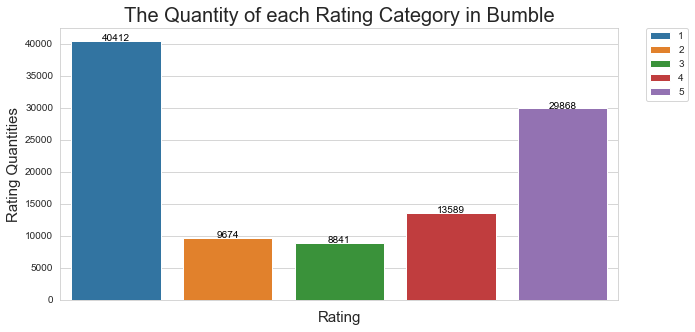

In [25]:
bumble_rating = ratings_analyst[ratings_analyst['app'] == "Bumble"]['rating'].value_counts().sort_index().rename_axis('rating').reset_index(name='counts')

labels = bumble_rating['rating'].tolist()

plt.figure(figsize=(10,5))
ax = sb.barplot(data=bumble_rating,
                x='rating', 
                y='counts', 
                hue='rating', 
                hue_order=labels, dodge=False)
ax.set_title("The Quantity of each Rating Category in Bumble", fontsize=20)
ax.set_ylabel("Rating Quantities", fontsize=15)
ax.set_xlabel("Rating", fontsize=15)
ax.set(xticklabels=[])

for index, row in bumble_rating.iterrows():
    ax.text(row.name,row.counts, row.counts, color='black', ha="center")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

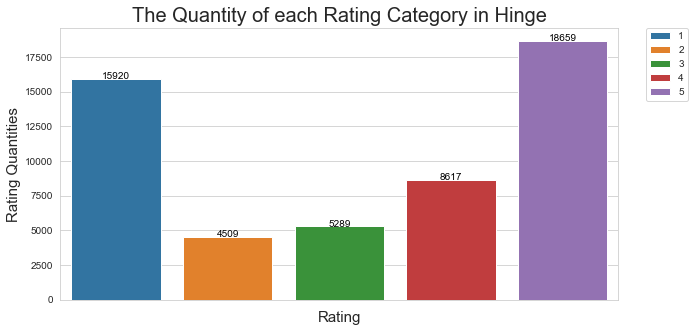

In [26]:
hinge_rating = ratings_analyst[ratings_analyst['app'] == "Hinge"]['rating'].value_counts().sort_index().rename_axis('rating').reset_index(name='counts')

labels = hinge_rating['rating'].tolist()

plt.figure(figsize=(10,5))
ax = sb.barplot(data=hinge_rating,
                x='rating', 
                y='counts', 
                hue='rating', 
                hue_order=labels, dodge=False)
ax.set_title("The Quantity of each Rating Category in Hinge", fontsize=20)
ax.set_ylabel("Rating Quantities", fontsize=15)
ax.set_xlabel("Rating", fontsize=15)
ax.set(xticklabels=[])

for index, row in hinge_rating.iterrows():
    ax.text(row.name,row.counts, row.counts, color='black', ha="center")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 2. reviews quantity on each app (make an average score)

In [27]:
reviews_analyst = dataset[['app', 'review']]

In [28]:
reviews_analyst

,app,review
0,Tinder,On this app i cant find a partner
1,Tinder,Tinder would be so much better if we could spe...
2,Tinder,Still doesn't correctly notify matches or mess...
3,Tinder,"Got banned because I updated my bio to say ""I ..."
4,Tinder,Love it!
...,...,...
681989,Hinge,Useless - I'm in the UK and it tells me i'm ov...
681990,Hinge,I can't get past the initial set up. It won't...
681991,Hinge,This is incredible! A quality dating app for A...
681992,Hinge,"""Over Water"" ... Can't choose location."


In [29]:
# no reviews amount
reviews_analyst[reviews_analyst['review'] == 'no review']['app'].value_counts()

Tinder    1346
Bumble       4
Hinge        2
Name: app, dtype: int64

In [30]:
# reviews amount
reviews_analyst[reviews_analyst['review'] != 'no review']['app'].value_counts()

Tinder    525269
Bumble    102380
Hinge      52992
Name: app, dtype: int64

In [31]:
# total amount
reviews_analyst['app'].value_counts()

Tinder    526615
Bumble    102384
Hinge      52994
Name: app, dtype: int64

# 3. The time of people making the review on each app

In [32]:
dataset

,name,review,rating,thumbs_up,date_time,app
0,linah sibanda,On this app i cant find a partner,5,0,2022-02-18 01:19:00,Tinder
1,Norman Johnson,Tinder would be so much better if we could spe...,3,0,2022-02-18 01:16:00,Tinder
2,David Hume,Still doesn't correctly notify matches or mess...,1,0,2022-02-18 01:11:00,Tinder
3,Last 1 Standing,"Got banned because I updated my bio to say ""I ...",2,0,2022-02-18 01:11:00,Tinder
4,Arthur Magamedov,Love it!,5,0,2022-02-18 01:06:00,Tinder
...,...,...,...,...,...,...
681989,A Google user,Useless - I'm in the UK and it tells me i'm ov...,2,5,2017-12-07 01:44:00,Hinge
681990,Brian Shook,I can't get past the initial set up. It won't...,1,11,2017-12-07 01:36:00,Hinge
681991,A Google user,This is incredible! A quality dating app for A...,5,1,2017-12-07 01:32:00,Hinge
681992,A Google user,"""Over Water"" ... Can't choose location.",2,8,2017-12-07 01:28:00,Hinge


In [33]:
time_analyst = dataset[['rating', 'date_time', 'app']]

In [34]:
time_analyst

,rating,date_time,app
0,5,2022-02-18 01:19:00,Tinder
1,3,2022-02-18 01:16:00,Tinder
2,1,2022-02-18 01:11:00,Tinder
3,2,2022-02-18 01:11:00,Tinder
4,5,2022-02-18 01:06:00,Tinder
...,...,...,...
681989,2,2017-12-07 01:44:00,Hinge
681990,1,2017-12-07 01:36:00,Hinge
681991,5,2017-12-07 01:32:00,Hinge
681992,2,2017-12-07 01:28:00,Hinge


In [36]:
time_analyst = dataset[['date_time']].copy()
time_analyst['date_time'] =  pd.to_datetime(time_analyst['date_time'], format="%H:%M")
time_analyst['date_time'] = time_analyst['date_time'].dt.strftime("%H.%M")
time_analyst['date_time'] = time_analyst['date_time'].astype(float)
time_analyst

,date_time
0,1.19
1,1.16
2,1.11
3,1.11
4,1.06
...,...
681989,1.44
681990,1.36
681991,1.32
681992,1.28


In [41]:
# Check the length in between 00:00 - 00:59, 01:00 - 01:59 so on...
def time_counting(dataframe):
    rating_time_list = dataframe['date_time'].tolist()
    timeframe = []
    counts = []
    for time_range in range(0, 24):
        length = 0
        for rating_time in rating_time_list:
            if(rating_time >= float(time_range)) & (rating_time <= round(time_range + 0.59, 2)):
                length += 1
        counts.append(length)
        timeframe.append(format(time_range, ".2f").replace('.', ':'))
    dataset = [timeframe, counts]
    return dataset

In [42]:
time_dataset = time_counting(time_analyst)
time_dataset

[['0:00',
  '1:00',
  '2:00',
  '3:00',
  '4:00',
  '5:00',
  '6:00',
  '7:00',
  '8:00',
  '9:00',
  '10:00',
  '11:00',
  '12:00',
  '13:00',
  '14:00',
  '15:00',
  '16:00',
  '17:00',
  '18:00',
  '19:00',
  '20:00',
  '21:00',
  '22:00',
  '23:00'],
 [32697,
  30913,
  29419,
  28893,
  28615,
  28169,
  27990,
  28960,
  29728,
  30321,
  28912,
  28009,
  26000,
  24093,
  22845,
  22566,
  22945,
  24307,
  26703,
  29620,
  31096,
  32529,
  33548,
  33115]]

In [45]:
time_counts_df = pd.DataFrame([time_dataset[1]], columns=time_dataset[0])

test_df = time_counts_df.apply(pd.to_numeric)
test_df['Totals'] = test_df.sum(axis=1)
total_ratings = test_df['Totals'].iloc[0]
print(total_ratings)

681993


In [46]:
time_counts_df.T

,0
0:00,32697
1:00,30913
2:00,29419
3:00,28893
4:00,28615
5:00,28169
6:00,27990
7:00,28960
8:00,29728
9:00,30321


In [47]:
ratings_count = sorted(time_counts_df.values.tolist()[0])

In [48]:
print(int(np.quantile(ratings_count, .35)))
print(int(np.quantile(ratings_count, .70)))

28017
29787


In [49]:
print(time_counts_df.min().min())
print(time_counts_df.max().max())

22566
33548


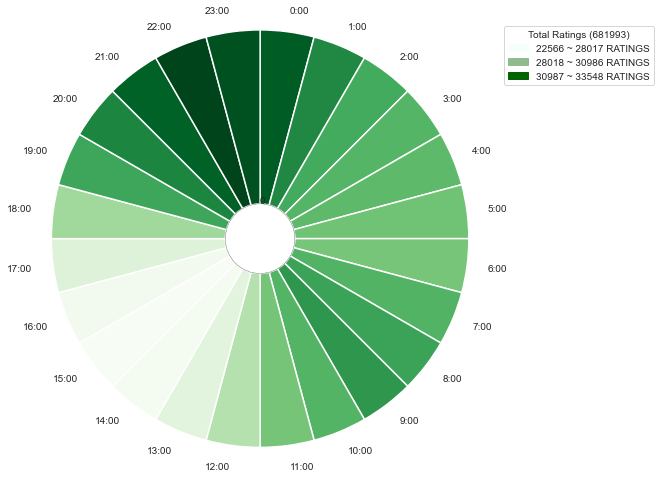

In [50]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.patches as mpatches
# make a heatmap building function 
def pie_heatmap(table, cmap=cm.Greens, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)



plt.figure(figsize=(8,8))
pie_heatmap(time_counts_df, vmin=time_counts_df.min().min() - 11,vmax=time_counts_df.max().max(),inner_r=0.2)

ratings_lowest = time_counts_df.min().min()
ratings_highest = time_counts_df.max().max()

# customize legend
mintcream_patch = mpatches.Patch(color='mintcream', label=f'{ratings_lowest} ~ {int(np.quantile(ratings_count, .35))} RATINGS')
darkseagreen_patch = mpatches.Patch(color='darkseagreen', label=f'{int(np.quantile(ratings_count, .35)) + 1} ~ {int(np.quantile(ratings_count, .80))} RATINGS')
darkgreen_patch = mpatches.Patch(color='darkgreen', label=f'{int(np.quantile(ratings_count, .80)) + 1} ~ {ratings_highest} RATINGS')

plt.legend(handles=[mintcream_patch, darkseagreen_patch, darkgreen_patch], title=f'Total Ratings ({total_ratings})', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

# for basic summary data
total_traffic = total_clicks

# 4. Word Analyst

In [127]:
word_analyst = dataset[['review', 'rating', 'thumbs_up', 'app']].copy()

In [128]:
word_analyst.head()

,review,rating,thumbs_up,app
0,On this app i cant find a partner,5,0,Tinder
1,Tinder would be so much better if we could spe...,3,0,Tinder
2,Still doesn't correctly notify matches or mess...,1,0,Tinder
3,"Got banned because I updated my bio to say ""I ...",2,0,Tinder
4,Love it!,5,0,Tinder


In [129]:
word_analyst.isnull().sum()

review       0
rating       0
thumbs_up    0
app          0
dtype: int64

In [130]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [131]:
# data transformation
word_analyst['review'] = word_analyst['review'].astype(str).str.lower()
word_analyst.head(5)

,review,rating,thumbs_up,app
0,on this app i cant find a partner,5,0,Tinder
1,tinder would be so much better if we could spe...,3,0,Tinder
2,still doesn't correctly notify matches or mess...,1,0,Tinder
3,"got banned because i updated my bio to say ""i ...",2,0,Tinder
4,love it!,5,0,Tinder


In [132]:
regexp = RegexpTokenizer('\w+')
word_analyst['text_token'] = word_analyst['review'].apply(regexp.tokenize)
word_analyst.head(5)

,review,rating,thumbs_up,app,text_token
0,on this app i cant find a partner,5,0,Tinder,"[on, this, app, i, cant, find, a, partner]"
1,tinder would be so much better if we could spe...,3,0,Tinder,"[tinder, would, be, so, much, better, if, we, ..."
2,still doesn't correctly notify matches or mess...,1,0,Tinder,"[still, doesn, t, correctly, notify, matches, ..."
3,"got banned because i updated my bio to say ""i ...",2,0,Tinder,"[got, banned, because, i, updated, my, bio, to..."
4,love it!,5,0,Tinder,"[love, it]"


In [133]:
# installing 'stopwords' to remove unneccessary token (like “will”, “and”, “or”, “has”, …)
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Forge-15
[nltk_data]     1650\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
from nltk.corpus import stopwords

# Make a list of stopwords in english
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords (if you have)
my_stopwords = ['app', 'dating', 'new', 'please', 'use', 'people', 'guy', 'girl', 'got', 'apps',
                'user', 'site', 'phone', 'number', 'seem', 'review', 'plus', 'update', 'option',
               'time', 'tinder', 'bumble', 'hinge', 'think', 'used', 'tinder gold', 'tinder plus',
               'going', 'work', 'seems', 'reason', 'account', 'actually', 'tell', 'lot', 'let',
                'log', 'sure', 'either', 'issue', 'say', 'chat', 'using', 'maybe', 'come',
                'working', 'download', 'men', 'one', 'date', 'show']
stopwords.extend(my_stopwords)

In [135]:
# Remove stopwords
word_analyst['text_token'] = word_analyst['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
word_analyst.head(5)

,review,rating,thumbs_up,app,text_token
0,on this app i cant find a partner,5,0,Tinder,"[cant, find, partner]"
1,tinder would be so much better if we could spe...,3,0,Tinder,"[would, much, better, could, specify, race, lo..."
2,still doesn't correctly notify matches or mess...,1,0,Tinder,"[still, correctly, notify, matches, messages, ..."
3,"got banned because i updated my bio to say ""i ...",2,0,Tinder,"[banned, updated, bio, feel, like, girls, look..."
4,love it!,5,0,Tinder,[love]


In [136]:
# Remove infrequent words
word_analyst['text_token'] = word_analyst['text_token'].apply(lambda x: ' '.join([item for item in x if len(item) > 2]))
word_analyst.head(5)

,review,rating,thumbs_up,app,text_token
0,on this app i cant find a partner,5,0,Tinder,cant find partner
1,tinder would be so much better if we could spe...,3,0,Tinder,would much better could specify race looking i...
2,still doesn't correctly notify matches or mess...,1,0,Tinder,still correctly notify matches messages monopo...
3,"got banned because i updated my bio to say ""i ...",2,0,Tinder,banned updated bio feel like girls looking plu...
4,love it!,5,0,Tinder,love


In [137]:
# store the dataset for future usage
with open("C:/Users/Forge-15 1650/Google Drive/Portfolio/Playground/word_dataset.pickle", 'wb') as output:
    pickle.dump(word_analyst, output)

## For word analysis, start here

In [138]:
word_analyst = pd.read_pickle("./word_dataset.pickle")

In [139]:
word_analyst.head(5)

,review,rating,thumbs_up,app,text_token
0,on this app i cant find a partner,5,0,Tinder,cant find partner
1,tinder would be so much better if we could spe...,3,0,Tinder,would much better could specify race looking i...
2,still doesn't correctly notify matches or mess...,1,0,Tinder,still correctly notify matches messages monopo...
3,"got banned because i updated my bio to say ""i ...",2,0,Tinder,banned updated bio feel like girls looking plu...
4,love it!,5,0,Tinder,love


In [140]:
# Lemmatisation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Forge-15
[nltk_data]     1650\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [141]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
word_analyst['text_token'] = word_analyst['text_token'].apply(wordnet_lem.lemmatize)

In [142]:
all_words = ' '.join([word for word in word_analyst['text_token']])

(-0.5, 599.5, 399.5, -0.5)

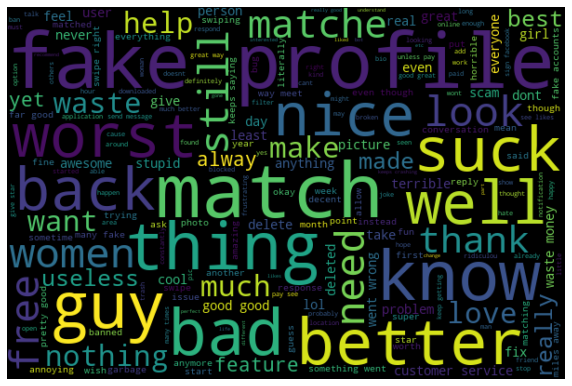

In [143]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

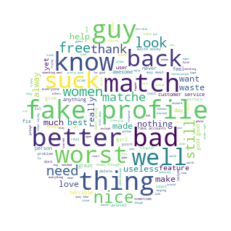

In [145]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

## Frequency distributions

In [146]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Forge-15
[nltk_data]     1650\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [147]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

### Most common words

In [149]:
fd.most_common(8)

[('good', 80952),
 ('like', 59755),
 ('get', 59296),
 ('great', 45008),
 ('even', 43812),
 ('matches', 41944),
 ('match', 30216),
 ('nice', 30046)]

In [150]:
fd.tabulate(5)

 good  like   get great  even 
80952 59755 59296 45008 43812 


### Plot common words

In [151]:
# Get top 10 words
top_10 = fd.most_common(10)

# create pandas series to make ploting easier
fdist = pd.Series(dict(top_10))

In [152]:
sb.set_theme(style="whitegrid")

<AxesSubplot:>

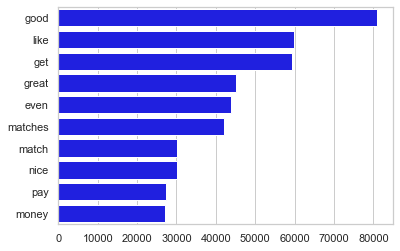

In [153]:
sb.barplot(y=fdist.index, x=fdist.values, color="blue")

In [156]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Search specific words

In [161]:
# show frequency of a specific word
fd["fake"]

24198

### Sentiment Analysis

### VADER lexicon
nltk provides a simple rule-based model for general sentiment analysis called VADER, which stands for "Valence Aware Dictionary and Sentiment Reasoner" (Hutto & Gilbert, 2014).

In [162]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\Forge-15
[nltk_data]     1650\AppData\Roaming\nltk_data...


True

### Sentiment

### Sentiment Intensity Analyzer
initialize an object of SentimentIntensityAnalyzer with name "analyzer":

In [163]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

### Polarity scores
Use the polarity_scores method:

In [165]:
word_analyst['polarity'] = word_analyst['text_token'].apply(lambda x: analyzer.polarity_scores(x))
word_analyst.head()

,review,rating,thumbs_up,app,text_token,polarity
0,on this app i cant find a partner,5,0,Tinder,cant find partner,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,tinder would be so much better if we could spe...,3,0,Tinder,would much better could specify race looking i...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
2,still doesn't correctly notify matches or mess...,1,0,Tinder,still correctly notify matches messages monopo...,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com..."
3,"got banned because i updated my bio to say ""i ...",2,0,Tinder,banned updated bio feel like girls looking plu...,"{'neg': 0.292, 'neu': 0.594, 'pos': 0.114, 'co..."
4,love it!,5,0,Tinder,love,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


### Transform data

In [166]:
# Change data structure
df_polarity = pd.concat([word_analyst.drop(['rating', 'thumbs_up', 'app'], axis=1),
                        word_analyst['polarity'].apply(pd.Series)], axis=1)
df_polarity.head()

,review,text_token,polarity,neg,neu,pos,compound
0,on this app i cant find a partner,cant find partner,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,tinder would be so much better if we could spe...,would much better could specify race looking i...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.000,0.791,0.209,0.4404
2,still doesn't correctly notify matches or mess...,still correctly notify matches messages monopo...,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",0.214,0.680,0.107,-0.7579
3,"got banned because i updated my bio to say ""i ...",banned updated bio feel like girls looking plu...,"{'neg': 0.292, 'neu': 0.594, 'pos': 0.114, 'co...",0.292,0.594,0.114,-0.5994
4,love it!,love,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,0.000,1.000,0.6369


In [167]:
# Create new variable with sentiment "neutral", "positive", and "negative"
df_polarity['sentiment'] = df_polarity['compound'].apply(lambda x: 'positive' if x>0 else 'neutral' if x==0 else 'negative')
df_polarity.head()

,review,text_token,polarity,neg,neu,pos,compound,sentiment
0,on this app i cant find a partner,cant find partner,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
1,tinder would be so much better if we could spe...,would much better could specify race looking i...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.000,0.791,0.209,0.4404,positive
2,still doesn't correctly notify matches or mess...,still correctly notify matches messages monopo...,"{'neg': 0.214, 'neu': 0.68, 'pos': 0.107, 'com...",0.214,0.680,0.107,-0.7579,negative
3,"got banned because i updated my bio to say ""i ...",banned updated bio feel like girls looking plu...,"{'neg': 0.292, 'neu': 0.594, 'pos': 0.114, 'co...",0.292,0.594,0.114,-0.5994,negative
4,love it!,love,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.000,0.000,1.000,0.6369,positive


### Analyze data

In [169]:
# Review with the highest positive sentiment
df_polarity.loc[df_polarity['compound'].idxmax()].values

array(['as a man, as a gay man, my personal experience with this app isn\'t indicative of everyone\'s experience on here. i feel like each gender, each sexuality, each person will have their own unique experience- most of which will be rather poor and uneventful. unless you\'re a girl or are extremely attractive, most matches you get will be by people who are lukewarm toward you. this means that, sure, you\'ve matched with them, but you\'ll never get a response. and the reason people like you when they may not be interested is because the app is designed to make people do that. the app will tell you whenever you missed a match, but here\'s the thing- if you didn\'t like them in the first place, what makes their desire change anything? okay, this person likes me, but i don\'t like them so... why bother telling me? the app preys on peoples\' desire for attention. "ohhh! someone likes me, don\'t i feel desired." and that\'s really what the app boils down to- attention. this app is less a 

In [170]:
df_polarity.loc[df_polarity['compound'].idxmin()].values

array(["here's how the profiles go... fake fake fake fake fake fake fake fake fake \nfake fake fake fake fake fake fake fake fake fake fake fake fake fake fake \nfake fake fake fake fake fake fake fake fake fake fake fake fake fake fake \nfake fake fake real?? oh no wait it's fake too! why can't you verify the \nemail address used for the facebook account??? it would delay the spammers \nat least..",
       'profiles fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake real wait fake verify email address facebook would delay spammers least',
       {'neg': 0.939, 'neu': 0.061, 'pos': 0.0, 'compound': -0.9991},
       0.939, 0.061, 0.0, -0.9991, 'negative'], dtype=object)

### Visualize data

<AxesSubplot:xlabel='count', ylabel='sentiment'>

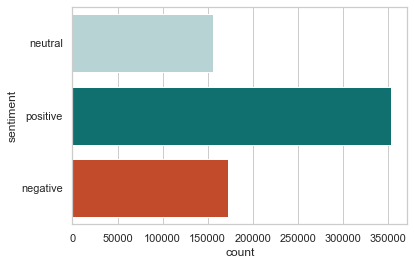

In [171]:
# Numbers of review
sb.countplot(y='sentiment',
            data=df_polarity,
            palette=['#b2d8d8',"#008080", '#db3d13'])

In [ ]:
# Öineplot need time data
g = sb.lineplot(x)

<AxesSubplot:xlabel='sentiment', ylabel='compound'>

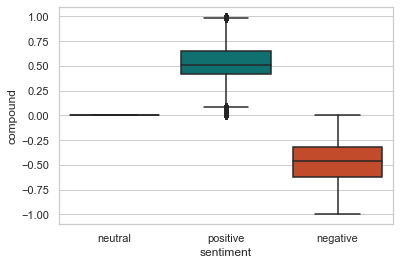

In [173]:
# Boxplot
sb.boxplot(y='compound',
           x='sentiment',
            data=df_polarity,
            palette=['#b2d8d8',"#008080", '#db3d13'])